In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import random
import numpy as np


In [2]:

def load_images(folder,train_percent):
    total_files_count=len(os.listdir(folder))
    all_file_names=os.listdir(folder)
    print("total number of files=",total_files_count)
    number_training=int(train_percent*total_files_count)
    
    train_files_list = random.sample(all_file_names, k=number_training)
    train_files_list.sort()
#     print(train_files_list)
#     set_A.difference(set_B) for (A - B)
#     test_files_list=list(set(all_file_names)-set(train_files_list))
    test_files_list = [] 
    for f_name in all_file_names:
        if f_name not in train_files_list:            
            test_files_list.append(f_name)
    test_files_list.sort()
#     print(len(train_files_list)," training images  and ",len(test_files_list)," test images")
#     print(test_files_list)

    X_train=[]
    X_test=[]
    for file_name in train_files_list:
        img=cv2.imread(os.path.join(folder,file_name))
        X_train.append(img)

    for file_name in test_files_list:
        img=cv2.imread(os.path.join(folder,file_name))
        X_test.append(img)


    X_train=np.array(X_train)
    X_test=np.array(X_test)
    
        
    return X_train,X_test
    

In [3]:
img=cv2.imread("sample_images/ashhad_pics/ashhad10.jpg")

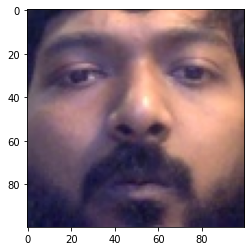

In [4]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [5]:
img.shape

(100, 100, 3)

In [6]:
from tensorflow.keras.datasets import mnist
from tensorflow.python.keras.utils import np_utils
from tensorflow.keras import Sequential
from tensorflow.keras import Model

from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Reshape, Conv2DTranspose, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop

from tensorflow.keras.models import load_model
input_img = Input(shape=(100, 100, 3))



# Using transpose Conv2DTranspose

In [ ]:
# Reference: https://medium.com/analytics-vidhya/building-a-convolutional-autoencoder-using-keras-using-conv2dtranspose-ca403c8d144e


In [7]:
x_train,x_test=load_images("sample_images/ashhad_pics",0.9)
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape,x_test.shape)
x_train = np.reshape(x_train, (len(x_train), 100, 100, 3))
x_test = np.reshape(x_test, (len(x_test), 100, 100, 3))
print(x_train.shape,x_test.shape)


# to test on mnist
# from tensorflow.keras.datasets import mnist
# import numpy as np

# (x_train, _), (x_test, _) = mnist.load_data()

# x_train = x_train.astype('float32') / 255.
# x_test = x_test.astype('float32') / 255.
# x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
# x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))


total number of files= 5007
(4506, 100, 100, 3) (501, 100, 100, 3)
(4506, 100, 100, 3) (501, 100, 100, 3)


In [ ]:
25*25*3

In [36]:
#ENCODER
inp = Input((x_train[0].shape))
e = Conv2D(32, (3, 3), activation='relu')(inp)
e = Conv2D(32, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
e = MaxPooling2D((2, 2))(e)
e = Conv2D(64, (3, 3), activation='relu')(e)
l = Flatten()(e)
# l = Dense(49, activation='softmax')(l)#DECODER
l = Dense(1875, activation='relu')(l)#DECODER
l = Dense(1675, activation='relu')(l)#DECODER
l = Dense(1275, activation='relu')(l)#DECODER
l = Dense(900, activation='relu')(l)#DECODER
l = Dense(500, activation='relu')(l)#DECODER
d = Dense(250, activation='relu')(l)#DECODER
d = Dense(500, activation='relu')(d)#DECODER
d = Dense(900, activation='relu')(d)#DECODER
d = Dense(1275, activation='relu')(d)#DECODER
d = Dense(1675, activation='relu')(d)#DECODER
d = Dense(1875, activation='relu')(d)#DECODER


# d = Reshape((7,7,1))(l)
d = Reshape((25,25,3))(d)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
d = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
# decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(d)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(d)
ae = Model(inp, decoded)
ae.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 21, 21, 64)        3692

In [ ]:
# compile it using adam optimizer
ae.compile(optimizer="adam", loss="mse")

#Train it by providing training images
ae.fit(x_train, x_train, epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


# validation loss of 0.0096
# 0.0063 at 1000 epochs

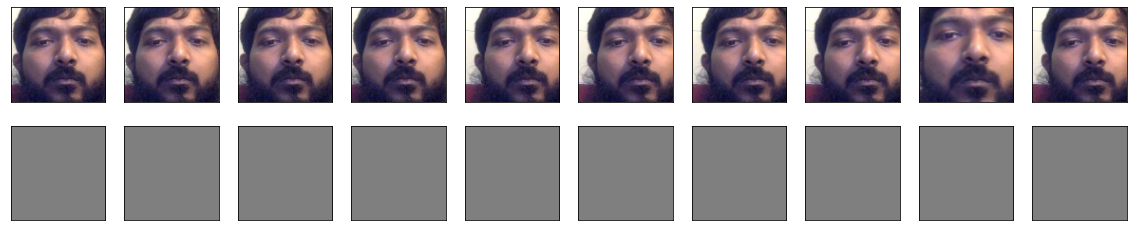

In [37]:
decoded_imgs = ae.predict(x_test)


n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
#     plt.imshow(x_test[i].reshape(100, 100, 3))
    plt.imshow(cv2.cvtColor(x_test[i].reshape(100, 100, 3), cv2.COLOR_BGR2RGB))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(100, 100, 3))
    plt.imshow(cv2.cvtColor(decoded_imgs[i].reshape(100, 100, 3), cv2.COLOR_BGR2RGB))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


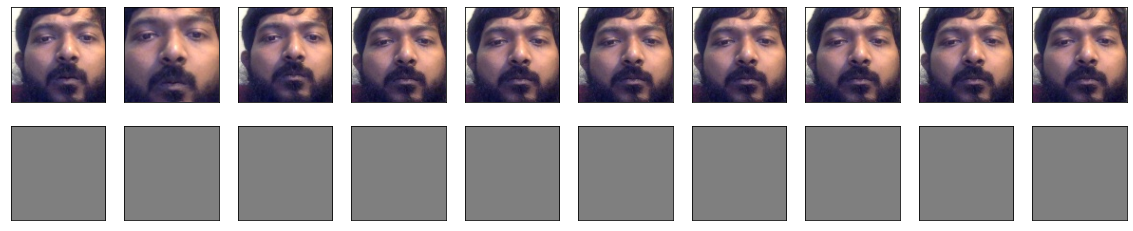

In [38]:
decoded_imgs = ae.predict(x_train[:20])


n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
#     plt.imshow(x_test[i].reshape(100, 100, 3))
    plt.imshow(cv2.cvtColor(x_train[i].reshape(100, 100, 3), cv2.COLOR_BGR2RGB))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(100, 100, 3))
    plt.imshow(cv2.cvtColor(decoded_imgs[i].reshape(100, 100, 3), cv2.COLOR_BGR2RGB))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
ae.save("models/cnn2d_enc.h5")

In [ ]:
ae.summary()

In [39]:
ae=load_model("models/cnn2d_enc.h5")

In [40]:
layer_name = 'dense_25'
encoder = Model(inputs=ae.input,outputs=ae.get_layer(layer_name).output)

In [41]:
idx = 14  # index of desired layer
input_shape = ae.layers[idx].get_input_shape_at(0) # get the input shape of desired layer
layer_input = Input(shape=input_shape) # a new input tensor to be able to feed the desired layer

# create the new nodes for each layer in the path
x = layer_input
for layer in ae.layers[idx:]:
    x = layer(x)

# create the model
just_decoder = Model(layer_input, x)

In [ ]:
intermediate_output = encoder(x_train[:1000])
print(intermediate_output.shape)
final_out=just_decoder(intermediate_output)
print(final_out.shape)

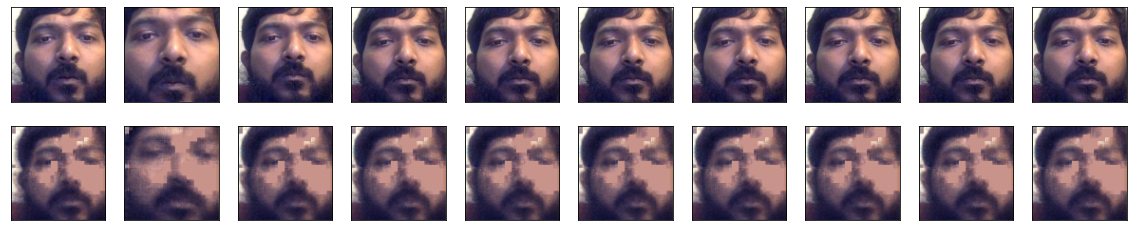

In [14]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(cv2.cvtColor(x_train[i].reshape(100, 100, 3), cv2.COLOR_BGR2RGB))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(cv2.cvtColor(np.array(final_out[i]).reshape(100, 100, 3), cv2.COLOR_BGR2RGB))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [34]:
import random
N=100
n_neighbors=100
max_dist=0.2
intermediate_output=np.array(intermediate_output)
new_codes=[]

while N>0:    
    for i in range(intermediate_output.shape[0]):
        v = intermediate_output[i,:]
        # sorted list of distance of val from x_train
        posit=np.argsort(abs((intermediate_output-v)*(intermediate_output-v)).sum(axis=1))
        kv = intermediate_output[posit[1:n_neighbors+1],:]
        # skip the first element as that will be 0
        # then take all the k closest neighbors  
        alphak = random.uniform(0,max_dist)
        m0 = v
        for j in range(n_neighbors):
            m1 = m0 + alphak * (kv[j,:] - m0)
            m0 = m1
        new_codes.append(m0)
        N-=1
        if N==0:
            break
        

(11, 100, 100, 3)


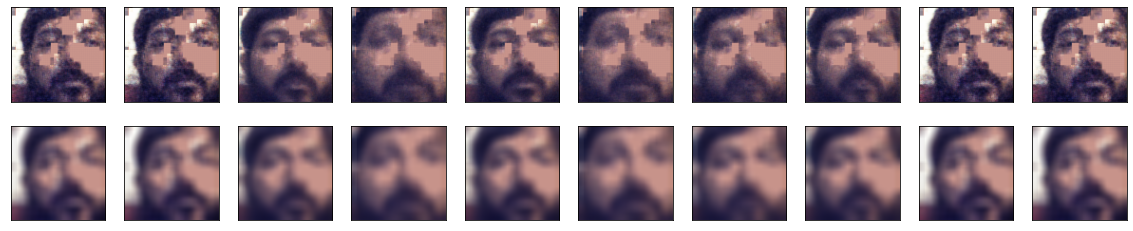

In [35]:
new_codes= np.array(new_codes)
decoded_augmented_out=just_decoder(new_codes)
decoded_augmented_out=np.array(decoded_augmented_out)

n = 10
decoded_augmented_out=random.sample(list(decoded_augmented_out),11)
decoded_augmented_out=np.array(decoded_augmented_out)
print(decoded_augmented_out.shape)
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
#     Display unblurred
    ax = plt.subplot(2, n, i)
    plt.imshow(cv2.cvtColor(decoded_augmented_out[i].reshape(100, 100, 3), cv2.COLOR_BGR2RGB))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i+n)
    img=np.array(decoded_augmented_out[i]).reshape(100, 100, 3)
    blur = cv2.blur(img,(10,10))
    plt.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()